<a href="https://colab.research.google.com/github/shlee0619/workMachineLearning/blob/main/1210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형회귀분석

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## 단순회귀분석

### 데이터 준비

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/hwda02/data/college.xlsx', engine = 'openpyxl')
df.head()

,School,Earnings,Cost,Grad,Debt,City
0,St. Ambrose C (NC),44800,22920,62,88,1
1,"Albion College (Albion, MI)",45100,23429,73,92,0
2,"Alfred University (Alfred, NY)",42300,19567,63,87,0
3,"Allegheny College (Meadville, PA)",49200,25147,78,92,0
4,"Beloit College (Beloit, WI)",37900,21979,78,93,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   School    116 non-null    object
 1   Earnings  116 non-null    int64 
 2   Cost      116 non-null    int64 
 3   Grad      116 non-null    int64 
 4   Debt      116 non-null    int64 
 5   City      116 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.6+ KB


### EDA

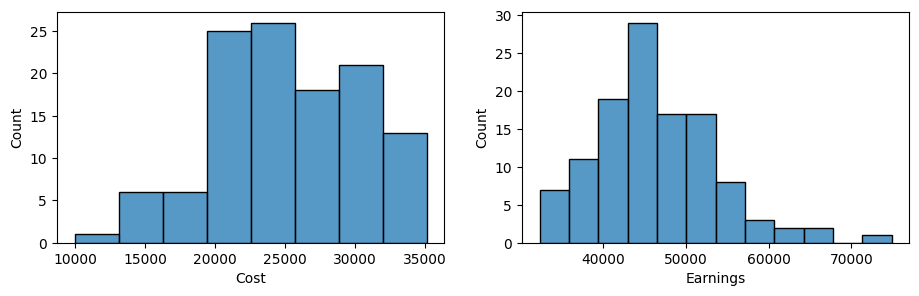

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Cost'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

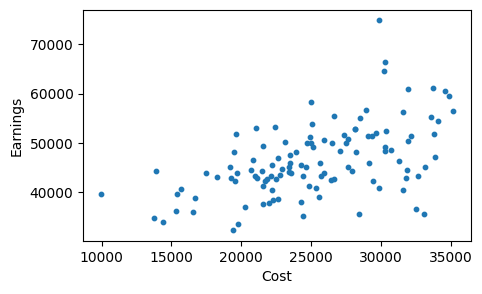

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Cost',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

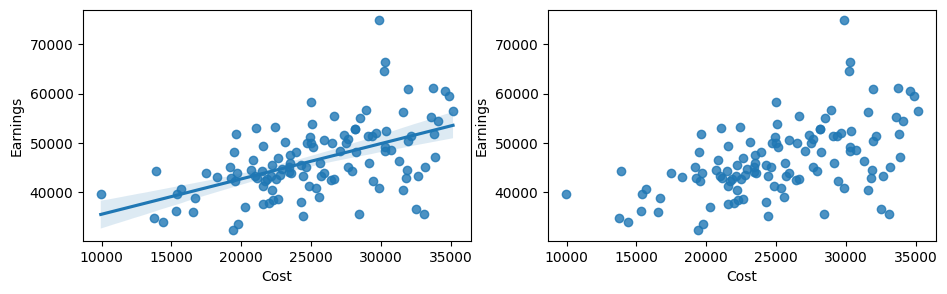

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

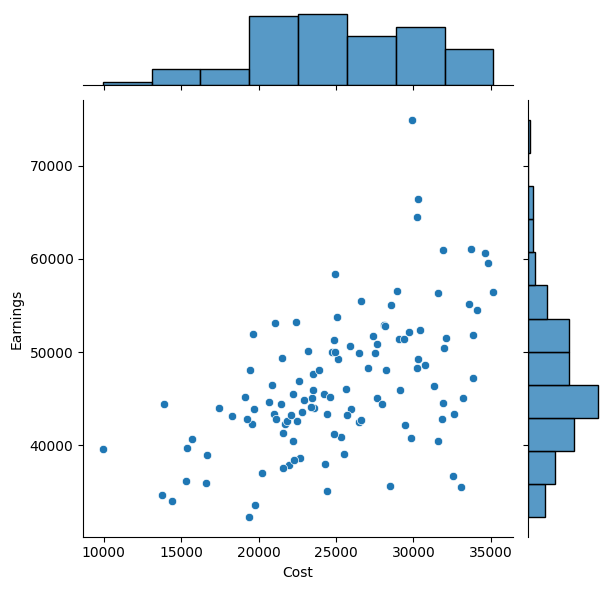

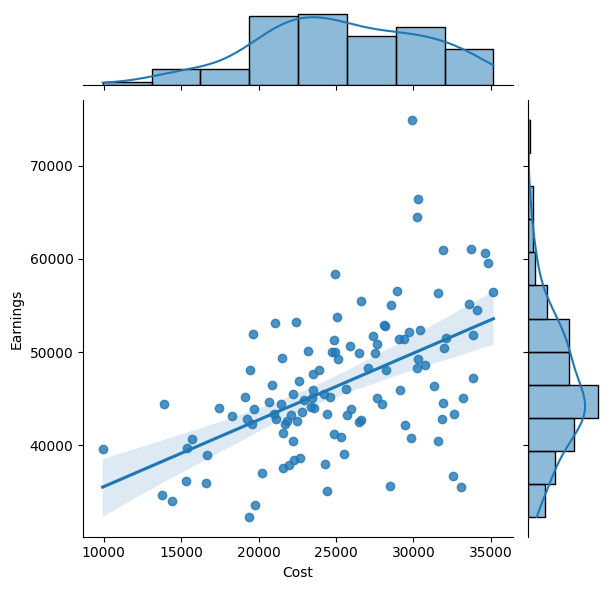

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Cost', y = 'Earnings', data = df)
sns.jointplot(x = 'Cost', y = 'Earnings', kind = 'reg', data = df)
plt.show()

### 모델

In [ ]:
# 전체 데이터
X = df[['Cost']]
y = df['Earnings']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (116, 1)
y 데이터:  (116,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
sr = LinearRegression()
# 모델 훈련
sr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(sr.score(X, y))
r2 = round(sr.score(X, y),2)
print(r2)

0.2766848724365063
0.28


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(sr.intercept_)
intercept = round(sr.intercept_,2)
print(intercept)

28375.405071295143
28375.41


In [ ]:
# 기울기
print(sr.coef_)
slope = round(sr.coef_[0],2)
print(slope)

[0.7169]
0.72


In [ ]:
print(X.columns)
print(X.columns[0])

Index(['Cost'], dtype='object')
Cost


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept) + " + " + str(slope) + "*" + X.columns[0]
print(equation)

y_hat = 28375.41 + 0.72*Cost


In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
print(rsquared)

R squared = 0.28


In [ ]:
# 예측값
y_pred = sr.predict(X)

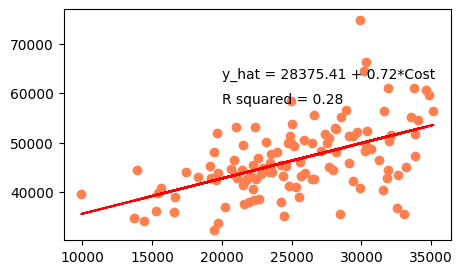

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X, y, 'o', color = 'coral')
plt.plot(X, y_pred, color = 'red')
plt.text(20000, 63000, equation)
plt.text(20000, 58000, rsquared)
plt.show()

In [ ]:
# 예측 성능 평가
# RMSE, MSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred))
# RMSE
print(mean_squared_error(y, y_pred, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred)))
# MAE
print(mean_absolute_error(y, y_pred))
# MAPE
print(mean_absolute_percentage_error(y, y_pred))

38652848.7822697
6217.141528248308
6217.141528248308
4652.193505215204
0.10155621111895947


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 독립변수 변경하여 반복

### EDA

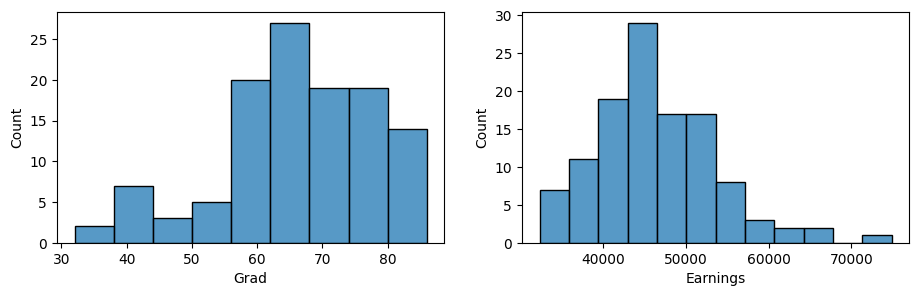

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Grad'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

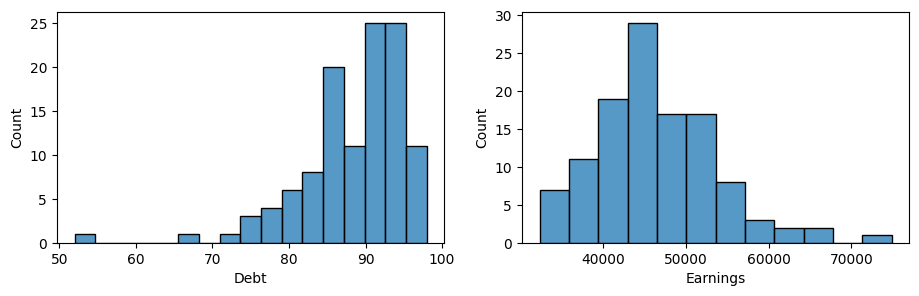

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.histplot(df['Debt'], ax = ax1)
sns.histplot(df['Earnings'], ax = ax2)
plt.show()

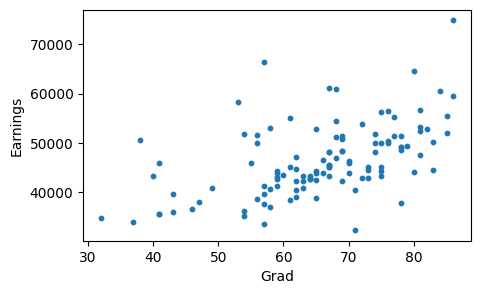

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Grad',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

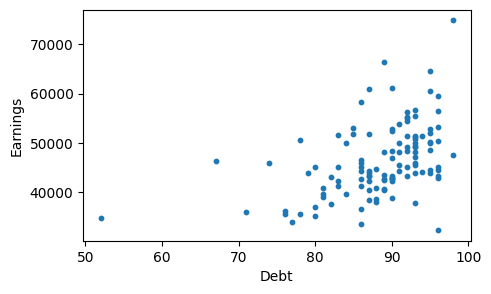

In [ ]:
# 산점도
df.plot(kind = 'scatter',
        x = 'Debt',
        y = 'Earnings',
        s = 10,
        figsize = (5,3))
plt.show()

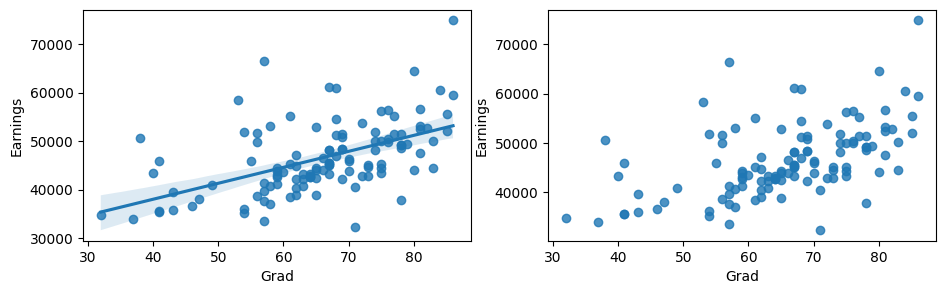

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

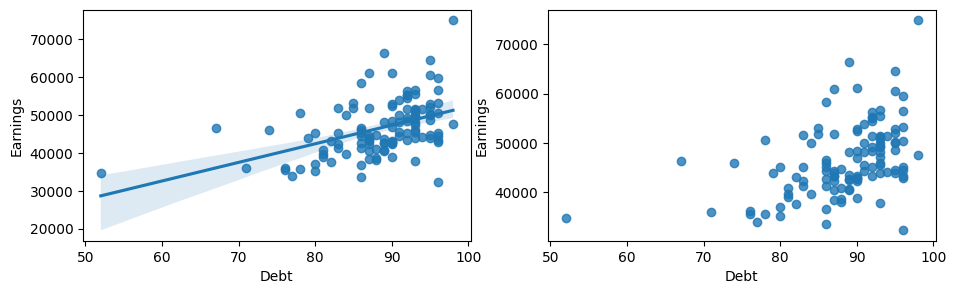

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 3])
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
plt.show()

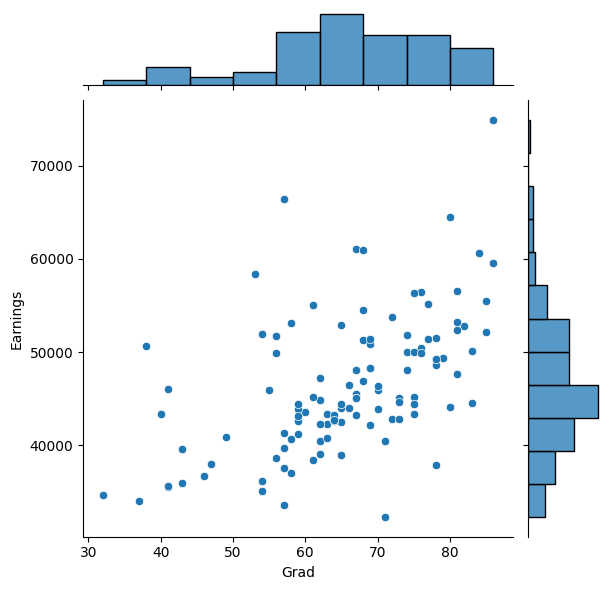

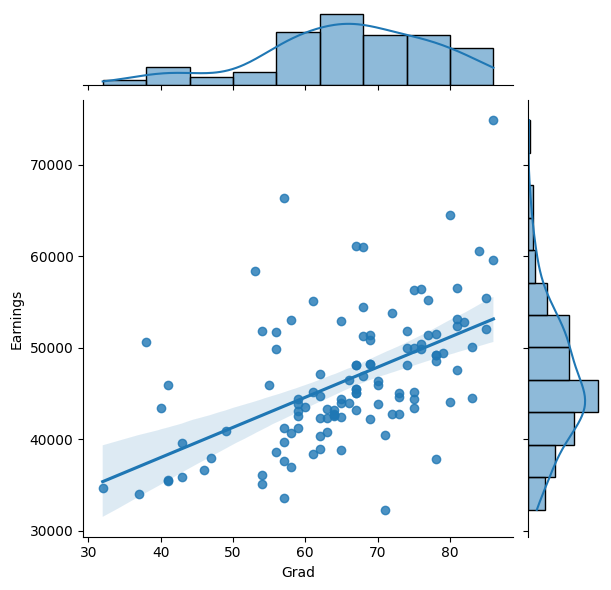

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Grad', y = 'Earnings', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', kind = 'reg', data = df)
plt.show()

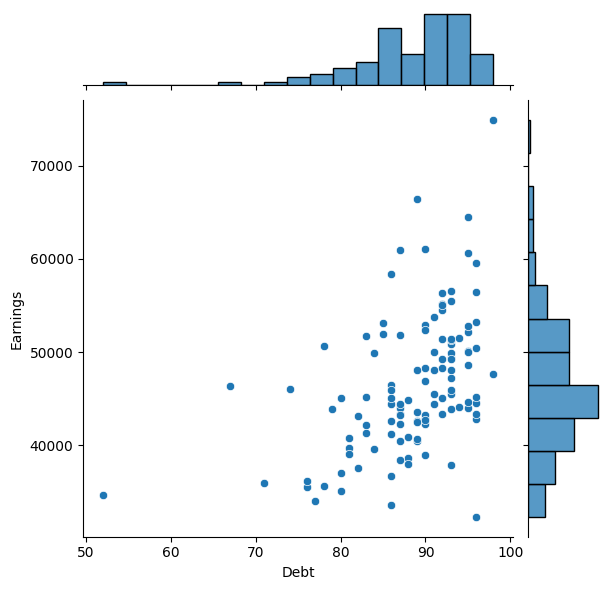

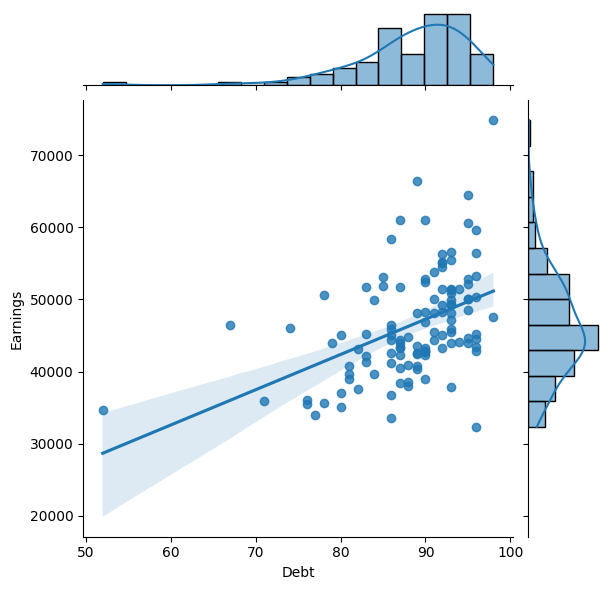

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Debt', y = 'Earnings', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', kind = 'reg', data = df)
plt.show()

### 모델

In [ ]:
# 전체 데이터
X1 = df[['Grad']]
X2 = df[['Debt']]
y = df['Earnings']

print("X1 데이터: ", X1.shape)
print("X2 데이터: ", X2.shape)
print("y 데이터: ", y.shape)

X1 데이터:  (116, 1)
X2 데이터:  (116, 1)
y 데이터:  (116,)


In [ ]:
# 단순선형회귀모델
from sklearn.linear_model import LinearRegression
m1 = LinearRegression();m1.fit(X1, y)
m2 = LinearRegression();m2.fit(X2, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(m1.score(X1, y))
m1_r2 = round(m1.score(X1, y),2)
print(m1_r2)
print(m2.score(X2, y))
m2_r2 = round(m2.score(X2, y),2)
print(m2_r2)

0.2783737715932024
0.28
0.20807551036565408
0.21


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(m1.intercept_)
intercept1 = round(m1.intercept_,2)
print(intercept1)
print(m2.intercept_)
intercept2 = round(m2.intercept_,2)
print(intercept2)

24851.556140479148
24851.56
3182.812342207908
3182.81


In [ ]:
# 기울기
print(m1.coef_)
slope1 = round(m1.coef_[0],2)
print(slope1)
print(m2.coef_)
slope2 = round(m2.coef_[0],2)
print(slope2)

[329.2584]
329.26
[489.7312]
489.73


In [ ]:
print(X1.columns)
print(X1.columns[0])
print(X2.columns)
print(X2.columns[0])

Index(['Grad'], dtype='object')
Grad
Index(['Debt'], dtype='object')
Debt


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1) + " + " + str(slope1) + "*" + X1.columns[0]
print(equation1)
equation2 = "y_hat = " + str(intercept2) + " + " + str(slope2) + "*" + X2.columns[0]
print(equation2)

y_hat = 24851.56 + 329.26*Grad
y_hat = 3182.81 + 489.73*Debt


In [ ]:
# 결정계수
rsquared1 = "Model1 R squared = " + str(m1_r2)
print(rsquared1)
rsquared2 = "Model2 R squared = " + str(m2_r2)
print(rsquared2)

Model1 R squared = 0.28
Model2 R squared = 0.21


In [ ]:
# 예측값
y_pred1 = m1.predict(X1)
y_pred2 = m2.predict(X2)

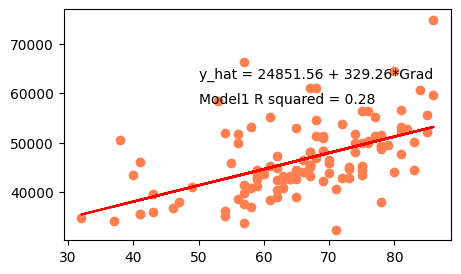

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X1, y, 'o', color = 'coral')
plt.plot(X1, y_pred1, color = 'red')
plt.text(50, 63000, equation1)
plt.text(50, 58000, rsquared1)
plt.show()

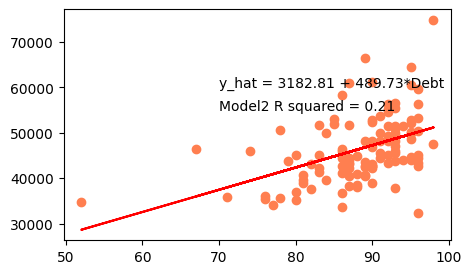

In [ ]:
# 산점도 + 회귀선 + 회귀식 + 결정계수
plt.figure(figsize = (5, 3))
plt.plot(X2, y, 'o', color = 'coral')
plt.plot(X2, y_pred2, color = 'red')
plt.text(70, 60000, equation2)
plt.text(70, 55000, rsquared2)
plt.show()

In [ ]:
# RMSE, MSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred1))
# RMSE
print(mean_squared_error(y, y_pred1, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred1)))
# MAE
print(mean_absolute_error(y, y_pred1))
# MAPE
print(mean_absolute_percentage_error(y, y_pred1))
print('\n')
# MSE
print(mean_squared_error(y, y_pred2))
# RMSE
print(mean_squared_error(y, y_pred2, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred2)))
# MAE
print(mean_absolute_error(y, y_pred2))
# MAPE
print(mean_absolute_percentage_error(y, y_pred2))

38562596.606938906
6209.878952680068
6209.878952680068
4523.437073230585
0.09648092694710192


42319227.64829148
6505.3230241311985
6505.3230241311985
5034.609567161763
0.10877300305850596


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
m1_rmse = mean_squared_error(y, y_pred1, squared = False)
m2_rmse = mean_squared_error(y, y_pred2, squared = False)
m1_mae = mean_absolute_error(y, y_pred1)
m2_mae = mean_absolute_error(y, y_pred2)
print(m1_rmse, m2_rmse)
print(m1_mae, m2_mae)

6209.878952680068 6505.3230241311985
4523.437073230585 5034.609567161763


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## 다중회귀분석

In [ ]:
df.columns

Index(['School', 'Earnings', 'Cost', 'Grad', 'Debt', 'City'], dtype='object')

### EDA

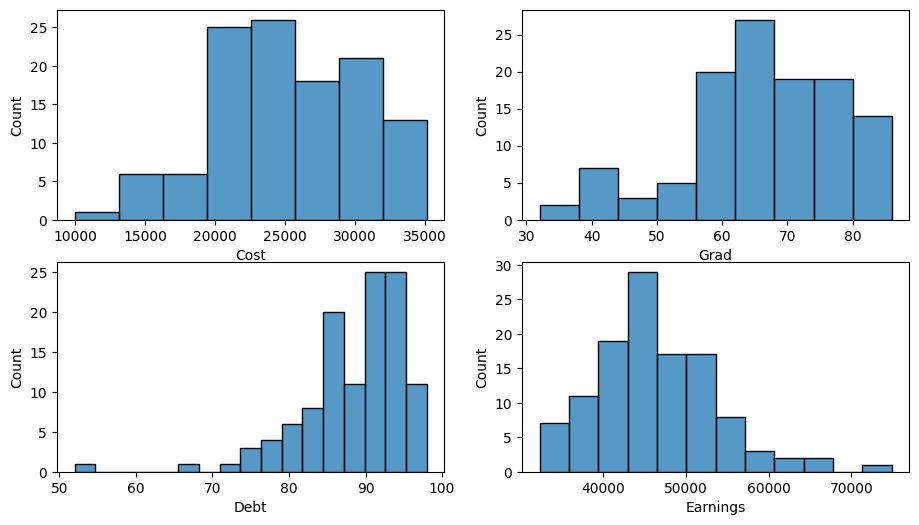

In [ ]:
# 히스토그램
fig = plt.figure(figsize = [11, 6])
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)
sns.histplot(df['Cost'], ax = ax1)
sns.histplot(df['Grad'], ax = ax2)
sns.histplot(df['Debt'], ax = ax3)
sns.histplot(df['Earnings'], ax = ax4)
plt.show()

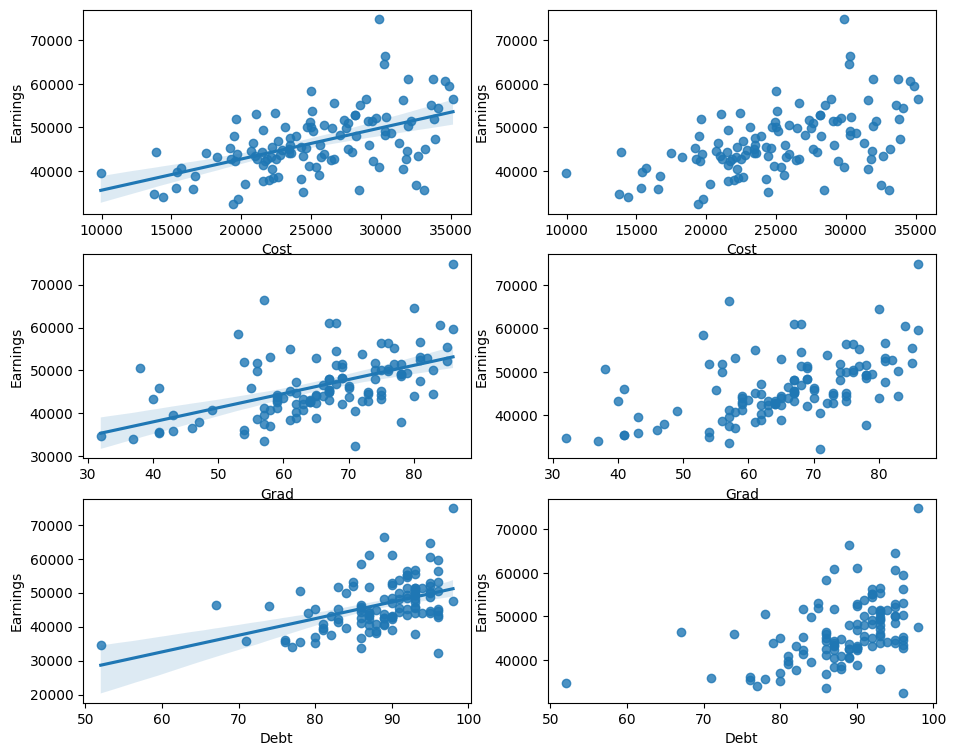

In [ ]:
# 산점도 + 회귀선
fig = plt.figure(figsize = [11, 9])
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, ax = ax1)
sns.regplot(x = 'Cost', y = 'Earnings', data = df, fit_reg = False, ax = ax2)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, ax = ax3)
sns.regplot(x = 'Grad', y = 'Earnings', data = df, fit_reg = False, ax = ax4)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, ax = ax5)
sns.regplot(x = 'Debt', y = 'Earnings', data = df, fit_reg = False, ax = ax6)
plt.show()

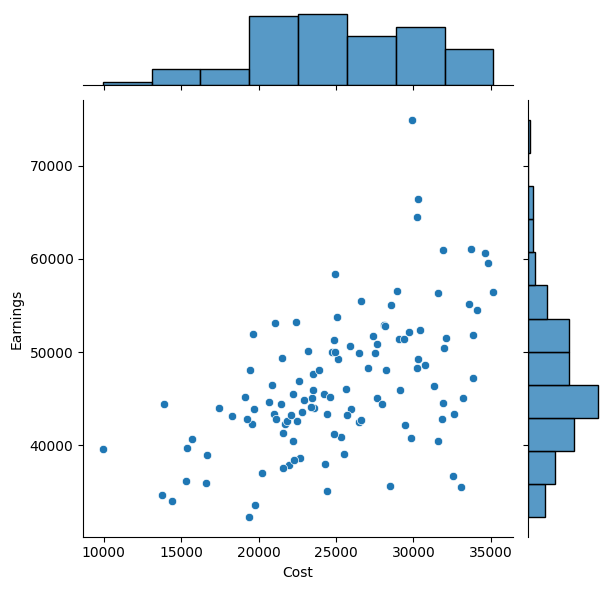

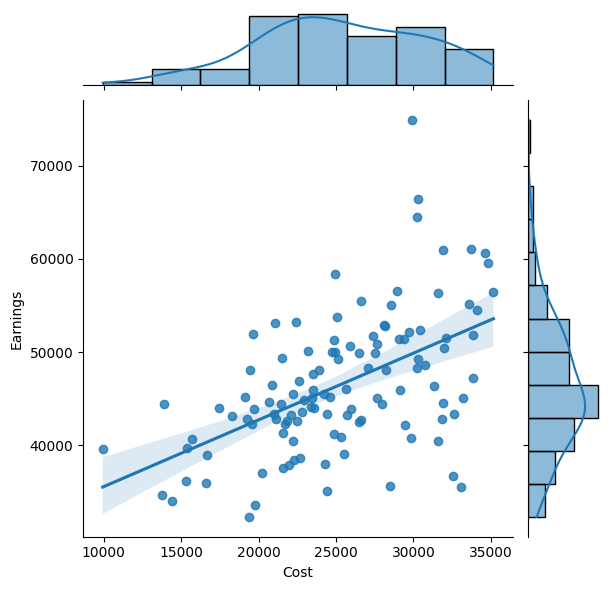

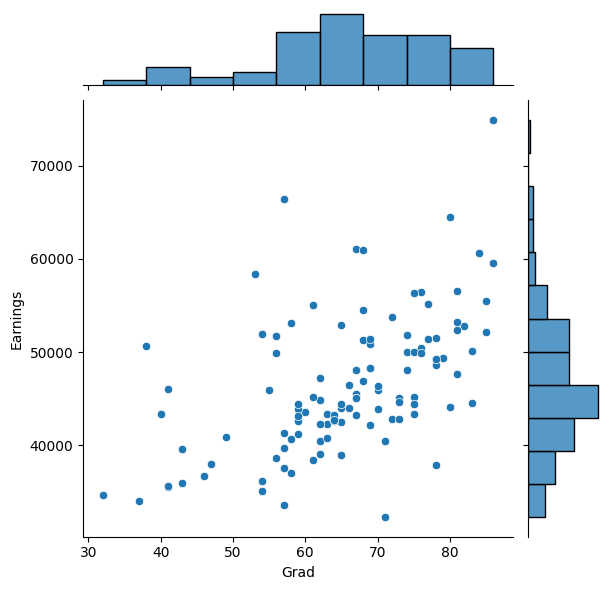

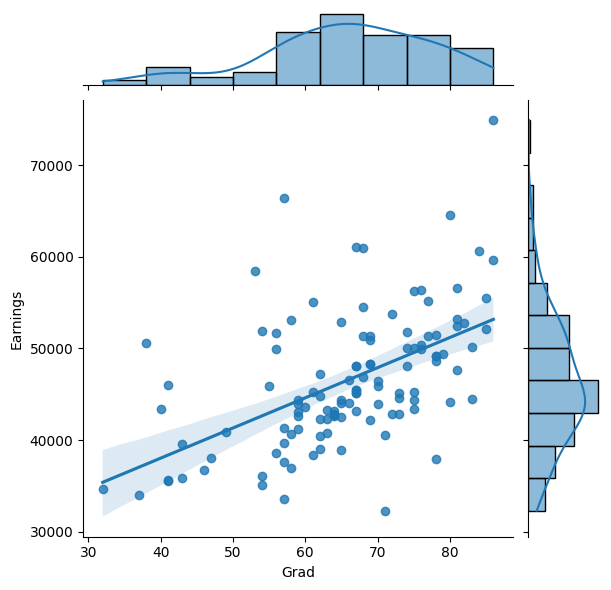

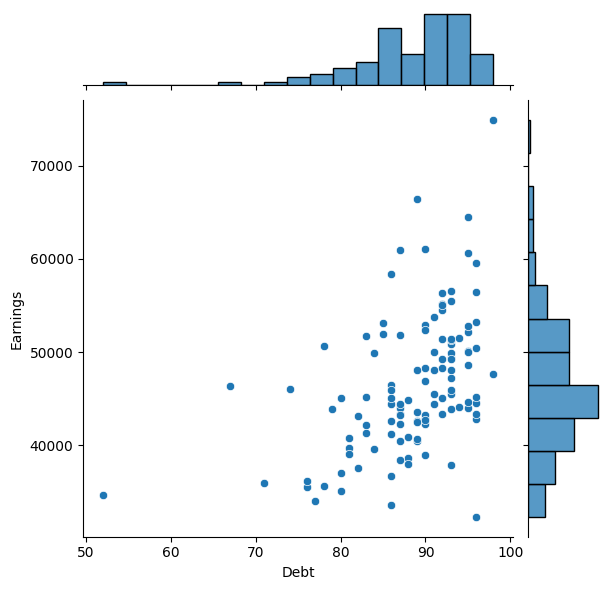

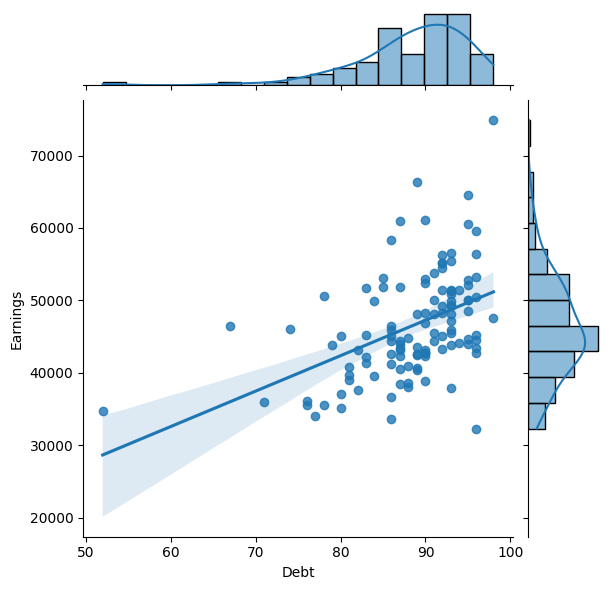

In [ ]:
# 조인트 그림
sns.jointplot(x = 'Cost', y = 'Earnings', data = df)
sns.jointplot(x = 'Cost', y = 'Earnings', kind = 'reg', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', data = df)
sns.jointplot(x = 'Grad', y = 'Earnings', kind = 'reg', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', data = df)
sns.jointplot(x = 'Debt', y = 'Earnings', kind = 'reg', data = df)
plt.show()

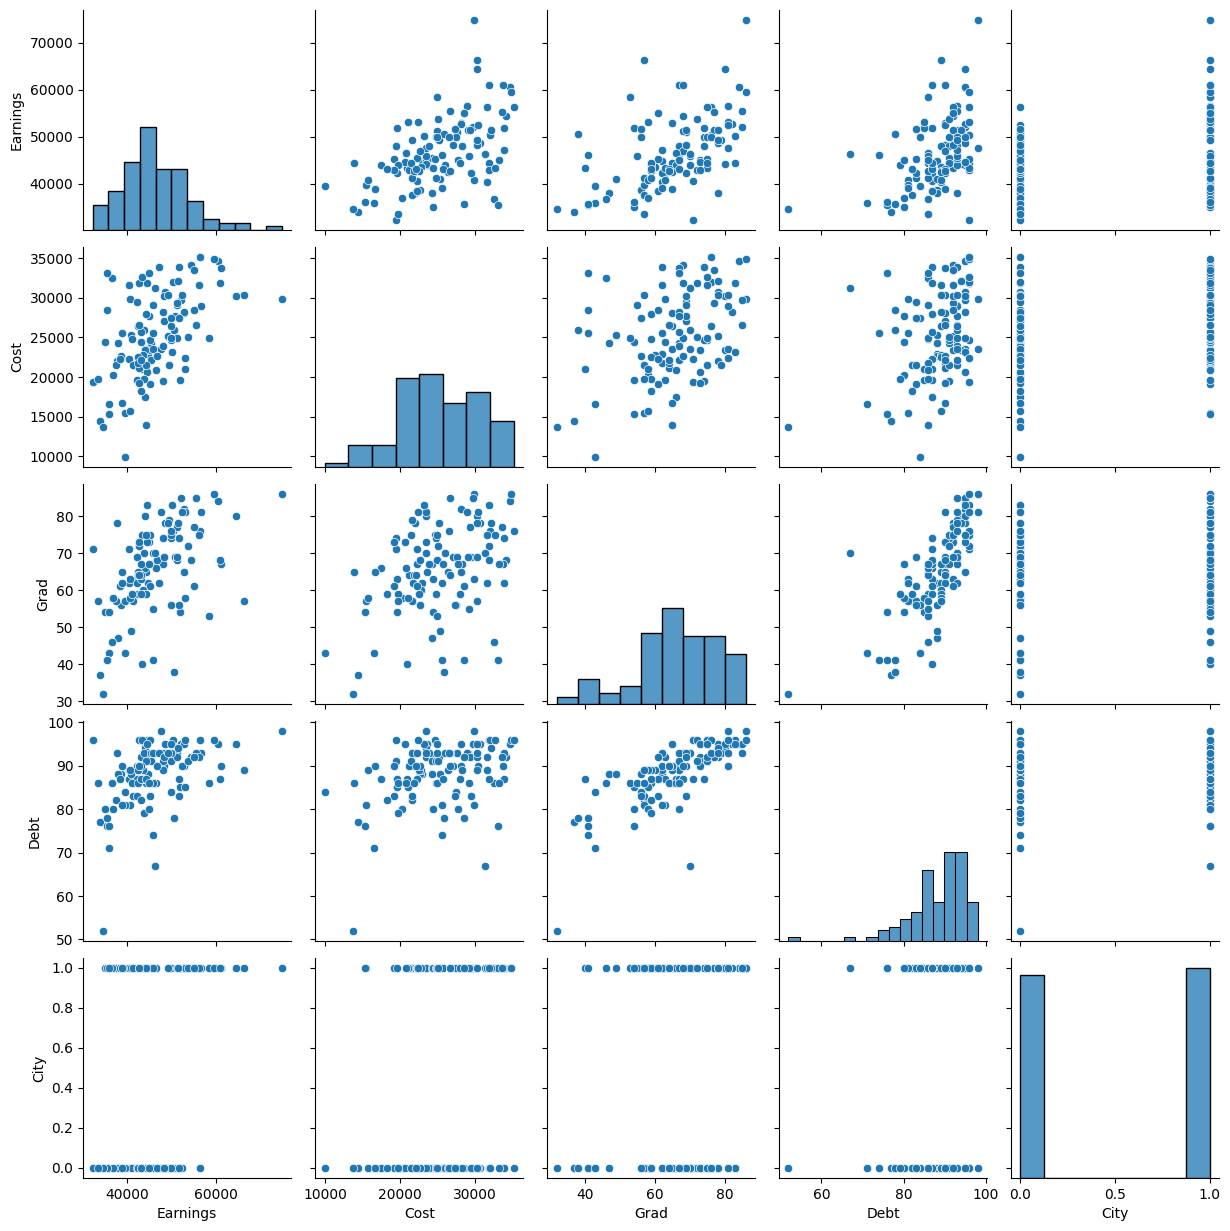

In [ ]:
# pair plot
sns.pairplot(df)
plt.show()

### 모델

In [ ]:
# 전체 데이터
X = df.loc[:,'Cost':'City']
y = df['Earnings']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (116, 4)
y 데이터:  (116,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
mr = LinearRegression()
# 모델 훈련
mr.fit(X, y)

LinearRegression()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(mr.score(X, y))
r2 = round(mr.score(X, y),2)
print(r2)

0.4292226665884976
0.43


In [ ]:
# 계수 = 모델 파라미터
# 절편
print(mr.intercept_)
intercept = round(mr.intercept_,2)
print(intercept)

10004.966451789987
10004.97


In [ ]:
# 기울기
print(mr.coef_)
slope = [round(x, 2) for x in mr.coef_]
print(slope)

[   0.4349  178.0989  141.4783 2526.7888]
[0.43, 178.1, 141.48, 2526.79]


In [ ]:
for name, coef in zip(X.columns, slope):
  print("{}: {}".format(name, coef))

Cost: 0.43
Grad: 178.1
Debt: 141.48
City: 2526.79


In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X.columns):
  equation += " + {}*{}".format(coef, name)
print(equation)

y_hat = 10004.97 + 0.43*Cost + 178.1*Grad + 141.48*Debt + 2526.79*City


In [ ]:
# 결정계수
rsquared = "R squared = " + str(r2)
print(rsquared)

R squared = 0.43


In [ ]:
# 예측값
y_pred = mr.predict(X)

In [ ]:
# 예측 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
# MSE
print(mean_squared_error(y, y_pred))
# RMSE
print(mean_squared_error(y, y_pred, squared = False))
print(np.sqrt(mean_squared_error(y, y_pred)))
# MAE
print(mean_absolute_error(y, y_pred))
# MAPE
print(mean_absolute_percentage_error(y, y_pred))

30501463.492155824
5522.813005358395
5522.813005358395
4088.9424357277067
0.08909875385487628


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
